In [ ]:
import pandas as pd
import spacy
!python3 -m spacy download ja_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 8.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ja_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [ ]:
nlp = spacy.load("ja_core_news_md")

In [ ]:
df = pd.read_csv('/content/Akutagawa_corpus2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  379 non-null    int64  
 1   link        379 non-null    object 
 2   author      379 non-null    object 
 3   year        125 non-null    float64
 4   title       379 non-null    object 
 5   text        378 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 17.9+ KB


Оставим только те произведения, год написания которых известен.

In [ ]:
df2=df[df['year']>0]

Уберем числа после запятой в колонке с годом.

In [ ]:
df2['year']=df2['year'].astype(int)

<ipython-input-7-37751d7abb86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year']=df2['year'].astype(int)


In [ ]:
df2.head()

,Unnamed: 0,link,author,year,title,text
0,0,https://www.aozora.gr.jp/cards/000879/files/48...,芥川龍之介,1920,愛読書の印象,\n愛読書の印象\n芥川龍之介\n\n\n\n\n 子供の時の愛読書は「西遊記」が第一である...
3,3,https://www.aozora.gr.jp/cards/000879/files/15...,芥川龍之介,1920,アグニの神,\nアグニの神\n芥川龍之介\n\n\n\n\n 一\n\n 支那の上海の或町で...
4,4,https://www.aozora.gr.jp/cards/000879/files/43...,芥川龍之介,1920,アグニの神,\nアグニの神\n芥川龍之介\n\n\n\n\n 一\n\n 支那の上海の或町です...
5,5,https://www.aozora.gr.jp/cards/000879/files/38...,芥川龍之介,1918,悪魔,\n悪魔\n芥川龍之介\n\n\n\n\n 伴天連うるがんの眼には、外の人の見えないものまで...
9,9,https://www.aozora.gr.jp/cards/000879/files/14...,芥川龍之介,1923,あばばばば,\nあばばばば\n芥川龍之介\n\n\n\n\n 保吉はずつと以前からこの店の主人を見知つて...


Загрузим и соберем в единый файл все стоп-слова и пунктуацию.

In [ ]:
path_stop = '/content/sw_ja.txt'
path_punct = '/content/punct.txt'

In [ ]:
with open(path_stop, encoding='utf-8') as txt:
    text = txt.read()
    stopwords = text.split()

with open(path_punct, encoding='utf-8') as txt:
    text = txt.read()
    stop_puncts = text.split()

stop_words = stopwords + stop_puncts
print(len(stop_words))

589


Напишем функцию для лемматизации и удаления стоп-слов.

In [ ]:
def preproc(text):
    parts = [text[i:i+1000] for i in range(0, len(text), 1000)]
    lemm_parts = []
    for text in parts:
        doc = nlp(text)
        lemms = [tok.lemma_ for tok in doc]
        clean_lemms = []
        for lemma in lemms:
            if lemma not in stop_words:
                clean_lemms.append(lemma)
        lemm_doc = ' '.join(clean_lemms)
        lemm_parts.append(lemm_doc)
    return ' '.join(lemm_parts)

In [ ]:
df2['lemmas'] = df2.text.apply(preproc)

<ipython-input-17-f4d148225416>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lemmas'] = df2.text.apply(preproc)


In [ ]:
df2.head()

,Unnamed: 0,link,author,year,title,text,lemmas
0,0,https://www.aozora.gr.jp/cards/000879/files/48...,芥川龍之介,1920,愛読書の印象,\n愛読書の印象\n芥川龍之介\n\n\n\n\n 子供の時の愛読書は「西遊記」が第一である...,\n 愛読 印象 \n 芥川 龍之介 \n\n\n\n\n 子供 愛読 「 西遊 記 今日...
3,3,https://www.aozora.gr.jp/cards/000879/files/15...,芥川龍之介,1920,アグニの神,\nアグニの神\n芥川龍之介\n\n\n\n\n 一\n\n 支那の上海の或町で...,\n アグニ 神 \n 芥川 龍之介 \n\n\n\n\n \n\n 支那 ...
4,4,https://www.aozora.gr.jp/cards/000879/files/43...,芥川龍之介,1920,アグニの神,\nアグニの神\n芥川龍之介\n\n\n\n\n 一\n\n 支那の上海の或町です...,\n アグニ 神 \n 芥川 龍之介 \n\n\n\n\n \n\n 支那 上...
5,5,https://www.aozora.gr.jp/cards/000879/files/38...,芥川龍之介,1918,悪魔,\n悪魔\n芥川龍之介\n\n\n\n\n 伴天連うるがんの眼には、外の人の見えないものまで...,\n 悪魔 \n 芥川 龍之介 \n\n\n\n\n 伴天連 うる がん 眼 見える 見え...
9,9,https://www.aozora.gr.jp/cards/000879/files/14...,芥川龍之介,1923,あばばばば,\nあばばばば\n芥川龍之介\n\n\n\n\n 保吉はずつと以前からこの店の主人を見知つて...,\n あ ばばば \n 芥川 龍之介 \n\n\n\n\n 保吉 ずつと 主人 見知 つう...


С помощью облака слов проверим наличие стоп-слов.

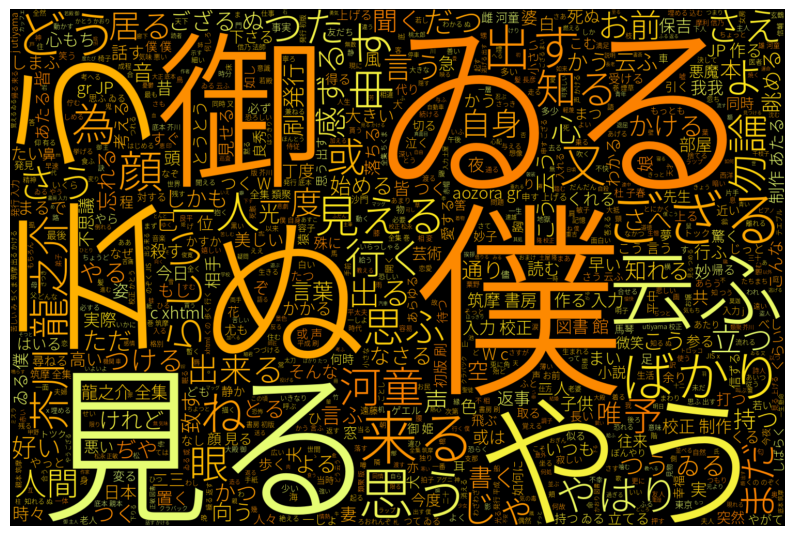

In [ ]:
# загрузка японского шрифта
font_path = 'NotoSansCJKjp-Light.otf'

wordcloud2 = WordCloud(width=1500,
                      height=1000,
                      background_color='black',
                      max_words=900,
                      colormap='Wistia_r',
                      font_path=font_path,
                      normalize_plurals=True).generate(' '.join(df2['lemmas']))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df2.to_csv("Akutagawa_corpus_clean.csv", encoding='utf-8')